# Investigating TMDb movie dataset

<a id='intro'></a>
## Introduction


>### The TMDb dataset is collected over different movies over the years.
>>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>> This data helps us to analyse the movie trends and answer some related questions
>## Questions to be answered:
>#### Question1: How are runtime, popularity, revenue and frequency of movies varying over the years?
>#### Question2:How does genre effect a movie?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


### Data Wrangling Phase:

In [3]:
#reading the data
tmdb_data = pd.read_csv('data/tmdb_5000_movies.csv')
tmdb_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
tmdb_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [6]:
mean_data = tmdb_data.mean(skipna = True)

In [7]:
# Here the data is filtered according to the conditions provided

tmdb_data['budget'] = tmdb_data.budget.mask(tmdb_data.budget < 100, mean_data.budget)
tmdb_data['revenue'] = tmdb_data.revenue.mask(tmdb_data.revenue < 100, mean_data.revenue)
tmdb_data['runtime'] = tmdb_data.runtime.mask(tmdb_data.runtime < 5, mean_data.runtime)

In [8]:
tmdb_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,3.545515e+07,57165.484281,21.492301,1.070091e+08,107.655000,6.092172,690.217989
std,3.782849e+07,88694.614033,31.816650,1.545108e+08,20.673744,1.194612,1234.585891
min,1.000000e+02,5.000000,0.000000,1.030000e+02,14.000000,0.000000,0.000000
25%,1.200000e+07,9014.500000,4.668070,2.831255e+07,94.000000,5.600000,54.000000
50%,2.904504e+07,14629.000000,12.921594,8.226064e+07,104.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [9]:
# Check how many elements of each column are null
tmdb_data.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

### Data cleaning:

In [10]:
tmdb_data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [11]:
#Remove unnecessary columns
tmdb_data = tmdb_data.drop(['keywords','status','spoken_languages','homepage','tagline'], axis=1)

### Editing column names:

In [12]:
#Obtain the year from the given date

from datetime import datetime as d
def obt_year(data):
    '''Here we take a date as input and 
    return the year. If date is not
    mentioned, 2009 is returned
    '''
    if str(data)!='nan':
        return d.strftime(d.strptime(str(data), "%Y-%m-%d"), "%Y")
    else:
        return "2009"
#All the years are added to a new column
tmdb_data["release_year"] = tmdb_data["release_date"].apply(obt_year)

In [13]:
tmdb_data.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012


In [14]:
#Obtain the genre of the film
def split_genres(value):
    '''The genres given are in a very confusing
    format. So, this function takes each genre
    as an input and splits it and takes the first mentioned genre
    '''
    str=""
    lis = value.split(":")
    for i in range(0,len(lis)):
        if "name" in lis[i]:
            lis1 = lis[i+1].split("}")[0][2:-1]
            str=str+"||"+lis1
    return str[2:].split("||")[0]
#All the genres are added in a new column
tmdb_data['genre'] = tmdb_data['genres'].apply(split_genres)
tmdb_data.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,genre
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,Action
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,Adventure
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015,Action
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012,Action
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012,Action


## Exploring the data:

### Question1: How are runtime, popularity, revenue and frequency of movies releasing in an year varying over the years?

#### Variation in frequency of movies releasing in an year:

In [16]:
years_grouped_data = tmdb_data.groupby("release_year")
years_mean_data = tmdb_data.groupby("release_year").mean()

Text(0,0.5,'Frequency')

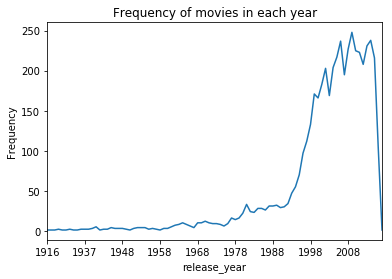

In [17]:
#Plot the trend of frequency against release_year
years_grouped_data.describe()['budget']['count'].plot( title='Frequency of movies in each year')
plt.ylabel('Frequency')

### Inference:
##### From the above plotted histogram, it can be observed that frequency of movies released increased drastically from the year after 1990

#### Variation in popularity:

Text(0,0.5,'Popularity')

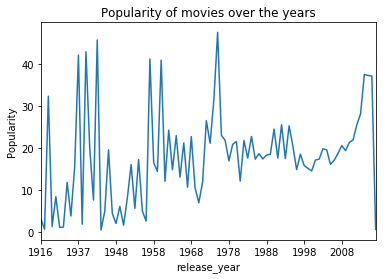

In [18]:
#Plot the trend of popularity against release_year
years_mean_data['popularity'].plot(title='Popularity of movies over the years')
plt.ylabel("Popularity")

In [90]:
years_mean_data['popularity'].describe()

count    90.000000
mean     17.801936
std      11.005901
min       0.579747
25%      11.022582
50%      17.485740
75%      21.917501
max      47.491443
Name: popularity, dtype: float64

Text(0,0.5,'Number of movies')

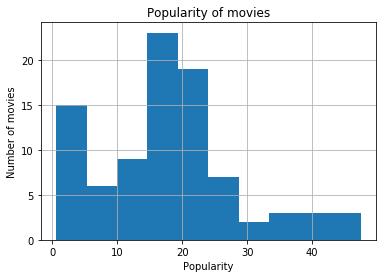

In [19]:
years_mean_data['popularity'].hist()
plt.title("Popularity of movies")
plt.xlabel("Popularity")
plt.ylabel("Number of movies")

### Inference:

##### Considering the mean, we can say that popularity for movies was less before 1958. But after 1958, even though there are notable variations, the trend went increasing. Popularity slowly increased. Popularity is high for the movies released around 1970. After that the popularity is maintained at a mean value and again started increasing consideraably after 2008.

#### Variation in runtime:

Text(0,0.5,'runtime')

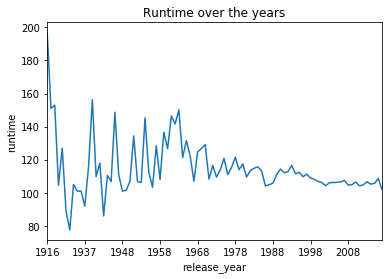

In [20]:
#Plot the trend of runtime against release_year
years_mean_data['runtime'].plot(title='Runtime over the years')
plt.ylabel('runtime')

Text(0,0.5,'Number of movies')

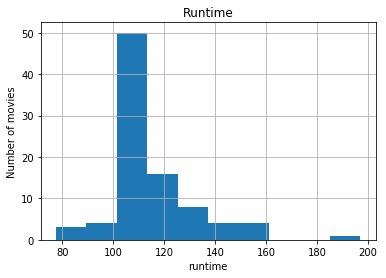

In [22]:
years_mean_data['runtime'].hist()
plt.title('Runtime')
plt.xlabel("runtime")
plt.ylabel("Number of movies")

In [23]:
years_mean_data['runtime'].describe()

count     90.000000
mean     114.903930
std       16.949437
min       77.500000
25%      106.082427
50%      110.150000
75%      117.852273
max      197.000000
Name: runtime, dtype: float64

##### The runtime is roughly the same over the years. It did not vary much even though we can see small variations in the graph.
##### The distribution is right skewed.

Text(0,0.5,'Revenue')

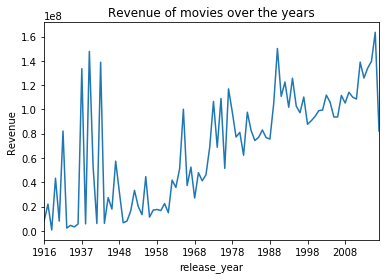

In [25]:
#Plot the trend of revenue against release_year
years_mean_data['revenue'].plot(title="Revenue of movies over the years")
plt.ylabel("Revenue")

###### We can clearly see that the mean revenue for movies has been increasing gradually. Even here we have some ups and downs, but, considering periods of years, we can see the increase in revenue.

### Question2: How does genre effect a movie?

#### Influence of genre:

In [26]:
tmdb_data.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,genre
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,Action
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,Adventure
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015,Action
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012,Action
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012,Action


In [27]:
#Make a copy of the previous data
genre_copy_data = tmdb_data.copy()

In [28]:
genre_copy_data.head()

,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,title,vote_average,vote_count,release_year,genre
0,237000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2.787965e+09,162.0,Avatar,7.2,11800,2009,Action
1,300000000.0,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,9.610000e+08,169.0,Pirates of the Caribbean: At World's End,6.9,4500,2007,Adventure
2,245000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,8.806746e+08,148.0,Spectre,6.3,4466,2015,Action
3,250000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1.084939e+09,165.0,The Dark Knight Rises,7.6,9106,2012,Action
4,260000000.0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,2.841391e+08,132.0,John Carter,6.1,2124,2012,Action


In [29]:
genre_copy_data['genre'].describe()

count      4803
unique       21
top       Drama
freq       1207
Name: genre, dtype: object

In [30]:
g = genre_copy_data.groupby('genre').mean()
y = genre_copy_data.groupby('release_year').mean()

Text(0,0.5,'Popularity')

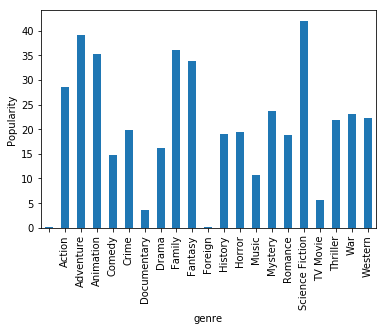

In [31]:
g['popularity'].plot(kind='bar')
plt.ylabel("Popularity")

###### Clearly science fiction has a lot of popularity which is followed by adventure films.

Text(0,0.5,'revenue')

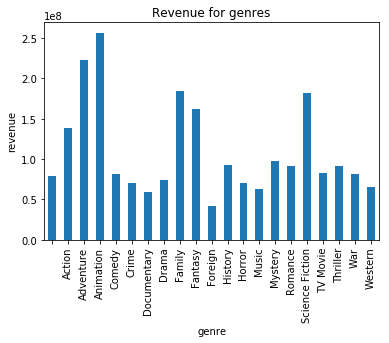

In [32]:
g['revenue'].plot(kind='bar')
plt.title("Revenue for genres")
plt.ylabel("revenue")

#### Inference:

##### As we can observe, Animation and Action genres earn the highest revenue.
### Thus we can interpret that genre influences the revenue and popularity for a movie significantly.

## Conclusions:
<p>For the first question posed(i.e How are frequency, popularity, revenue and runtime varying over the years?), we observed from the explorating phase, the following:</p>
<p><li><ul>Frequency of movies released increased drastically from the year after 1990</ul>
<ul>Popularity for movies was less before 1958. But after 1958, even though there are notable variations, the trend went increasing. Popularity slowly increased. Popularity is high for the movies released around 1970. After that the popularity is maintained at a mean value and again started increasing consideraably after 2008.</ul>
<ul>The runtime is roughly the same over the years. It did not vary much.</ul>
<ul>Mean revenue for movies has been increasing gradually. Even here we have some ups and downs, but, considering periods of years, we can see the increase in revenue.</ul>
</li></p>
<p>For the second question posed(i.e How does genre effect a movie?), we observed that genre effects both the popularity and revenue for a movie. Clearly, Science fiction has high popularity followed by adventure and revenue wise, animation is in the leading followed by adventure films. But causation does not imply correlation. We need more data here like the directors and cast details to conduct the observation</p>

### Limitations:

<p>
<li>
<ul>Some of the data is incomplete. So, the interpretation can be done a bit more precisely</ul>
<ul>More information is required. Directors and lead cast can also influence popularity and revenue for a movie.</ul>
</li>
</p>

<h5>References:</h5>
<p><a href="https://stackoverflow.com/">Stackoverflow</a> was used for many coding related queries</p>
<p><a href="https://matplotlib.org">Mathplotlib</a> was used</p>
<p><a href="http://pandas.pydata.org/pandas-docs/stable/">Pandas documentation</a> was used</p>